In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt


## Создание датасетов

In [2]:
def create_dataset(noised=False, verbose=False):
    xs = np.linspace(0, 10, 100)
    ys = 2 * xs + np.random.random(100) * 2 - 1
    
    if noised:
        ys[25:45] *= 2
        
    if verbose:
        plt.scatter(xs, ys)
        plt.show()
        
    return pd.DataFrame({'X': xs, 'y': ys}, columns=['X', 'y'])

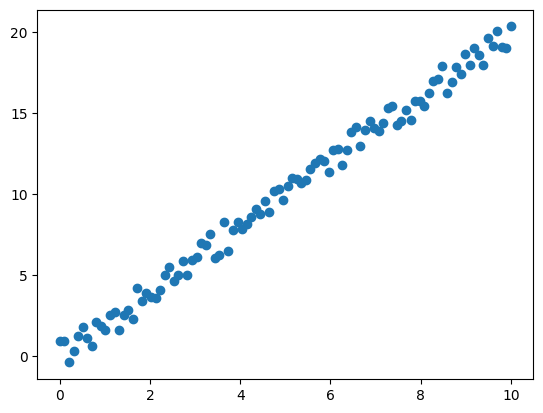

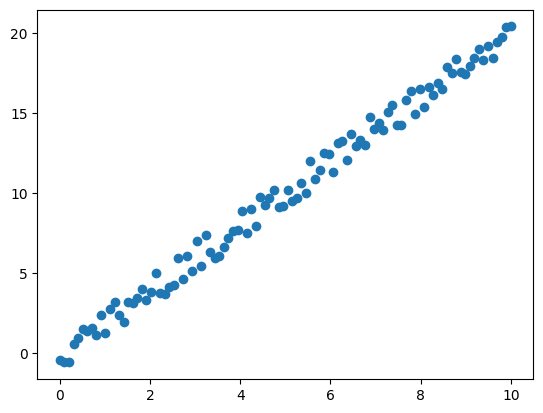

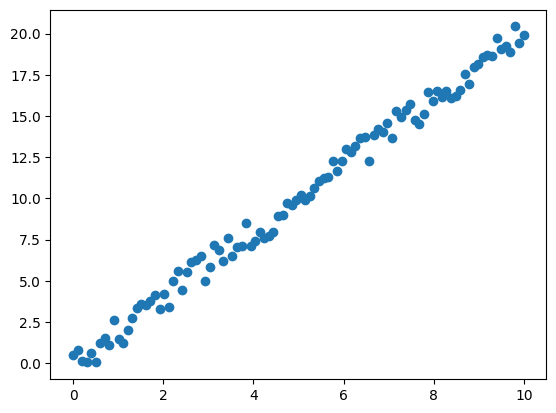

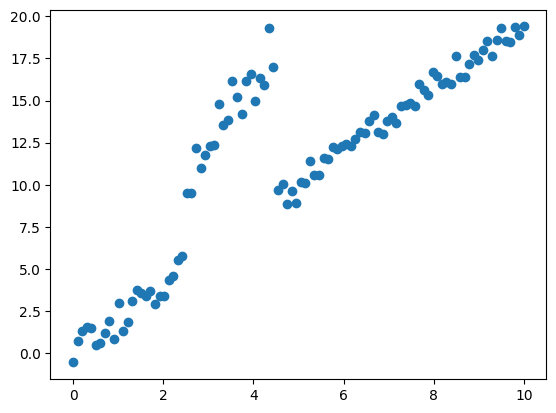

In [3]:
datasets = [create_dataset(noised=(i % 4 == 0), verbose=True) for i in range(1, 5)]

for j in range(1, len(datasets) + 1):
    datasets[j - 1].to_csv('df' + str(j) + '.csv', index=False)

## Создание тестового файла

In [4]:
%%writefile test.py
import pandas as pd
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

def get_dataset(df_name):
    df = pd.read_csv(df_name)
    return pd.DataFrame(df['X']), df['y']


def test_dataset():
    X_train, y_train = get_dataset('df1.csv')
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    for i in range(2, 5):
        X_test, y_test = get_dataset('df' + str(i) + '.csv')
        assert mse(model.predict(X_test), y_test) < 1, f"Датасет 'df{str(i)}.csv' зашумлён!"

Overwriting test.py


In [5]:
!pytest -v test.py

============================= test session starts =============================
platform win32 -- Python 3.9.7, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- C:\ProgramData\Anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\CEH\Skillfactory\ML\MLOps
plugins: anyio-2.2.0
collecting ... collected 1 item

test.py::test_dataset FAILED                                             [100%]

================================== FAILURES ===================================
________________________________ test_dataset _________________________________

    def test_dataset():
        X_train, y_train = get_dataset('df1.csv')
        model = LinearRegression()
        model.fit(X_train, y_train)
    
        for i in range(2, 5):
            X_test, y_test = get_dataset('df' + str(i) + '.csv')
>           assert mse(model.predict(X_test), y_test) < 1, f"Датасет 'df{str(i)}.csv' зашумлён!"
E           AssertionError: Датасет 'df4.csv' зашумлён!
E           assert 10.815554802247577 < 1
E           